In [1]:
# IMPORT ALL REQUIRED MODULE
import statsmodels.api as sms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
# LOADING DATA
df=pd.read_csv('airline_passengers.csv')

In [3]:
#first 5 rows
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
# Last 5 rows
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
# DROP UNWANTED ROWS
df.drop(144,inplace=True,axis=0)

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [7]:
# Covert datatype to datetime format
df['Month']=pd.to_datetime(df['Month'])

In [8]:
# SET index for month column
df.set_index("Month",inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [10]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


# Visualize the Time Series Data

<AxesSubplot:xlabel='Month'>

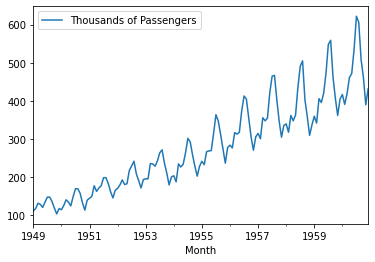

In [11]:
# plot df
df.plot()

# Make the time series data stationary

In [12]:
# import library for dicky fuller test
from statsmodels.tsa.stattools import adfuller

In [13]:
# Testing For Stationarity
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adf_test(df["Thousands of Passengers"])

ADF Statistics: 0.8153688792060423
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [15]:
df["Passengers first difference"]=df["Thousands of Passengers"]-df["Thousands of Passengers"].shift(1)

In [16]:
adf_test(df["Passengers first difference"].dropna())

ADF Statistics: -2.8292668241699874
p- value: 0.05421329028382711
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
df["Passengers second difference"]=df["Passengers first difference"]-df["Passengers first difference"].shift(1)

In [18]:
adf_test(df["Passengers second difference"].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [19]:
df["Passengers season difference"]=df["Thousands of Passengers"]-df["Thousands of Passengers"].shift(12)

In [20]:
adf_test(df["Passengers season difference"].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [21]:
df

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers season difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


# Plot the Correlation and AutoCorrelation Charts

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

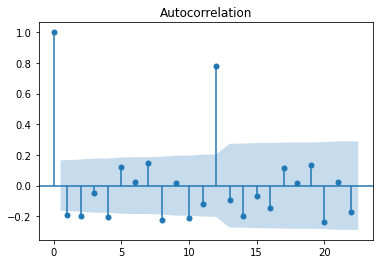

In [23]:
acf=plot_acf(df["Passengers second difference"].dropna())

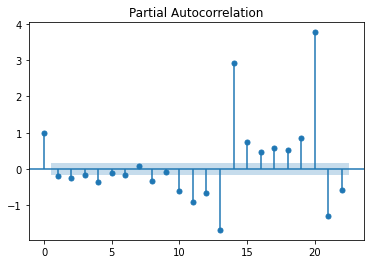

In [24]:
pacf=plot_pacf(df["Passengers second difference"].dropna())

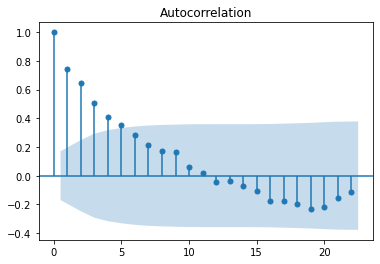

In [25]:
acf12=plot_acf(df["Passengers season difference"].dropna())

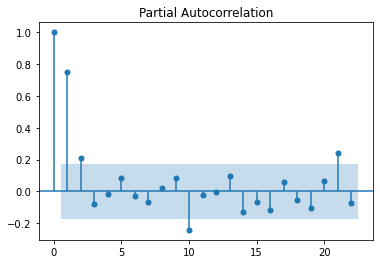

In [26]:
pacf12=plot_pacf(df["Passengers season difference"].dropna())

In [27]:
df

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers season difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [28]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [29]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [30]:
test_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers season difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


# Construct the ARIMA Model based on the data

In [31]:

from statsmodels.tsa.arima_model import ARIMA

In [32]:
train_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers season difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [33]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

In [34]:
model_Arima_fit=model_ARIMA.fit()

In [35]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Sat, 15 Oct 2022   AIC                            775.563
Time:                                17:41:28   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [36]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [37]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [38]:

pred

1956-01-01    0.426829
1956-02-01    0.426829
1956-03-01    0.426829
1956-04-01    0.426829
1956-05-01    0.426829
1956-06-01    0.426829
1956-07-01    0.426829
1956-08-01    0.426829
1956-09-01    0.426829
1956-10-01    0.426829
1956-11-01    0.426829
1956-12-01    0.426829
1957-01-01    0.426829
1957-02-01    0.426829
1957-03-01    0.426829
1957-04-01    0.426829
1957-05-01    0.426829
1957-06-01    0.426829
1957-07-01    0.426829
1957-08-01    0.426829
1957-09-01    0.426829
1957-10-01    0.426829
1957-11-01    0.426829
1957-12-01    0.426829
1958-01-01    0.426829
1958-02-01    0.426829
1958-03-01    0.426829
1958-04-01    0.426829
1958-05-01    0.426829
1958-06-01    0.426829
1958-07-01    0.426829
1958-08-01    0.426829
1958-09-01    0.426829
1958-10-01    0.426829
1958-11-01    0.426829
1958-12-01    0.426829
1959-01-01    0.426829
1959-02-01    0.426829
1959-03-01    0.426829
1959-04-01    0.426829
1959-05-01    0.426829
1959-06-01    0.426829
1959-07-01    0.426829
1959-08-01 

In [39]:
residuals

Month
1956-01-01    283.573171
1956-02-01    276.573171
1956-03-01    316.573171
1956-04-01    312.573171
1956-05-01    317.573171
1956-06-01    373.573171
1956-07-01    412.573171
1956-08-01    404.573171
1956-09-01    354.573171
1956-10-01    305.573171
1956-11-01    270.573171
1956-12-01    305.573171
1957-01-01    314.573171
1957-02-01    300.573171
1957-03-01    355.573171
1957-04-01    347.573171
1957-05-01    354.573171
1957-06-01    421.573171
1957-07-01    464.573171
1957-08-01    466.573171
1957-09-01    403.573171
1957-10-01    346.573171
1957-11-01    304.573171
1957-12-01    335.573171
1958-01-01    339.573171
1958-02-01    317.573171
1958-03-01    361.573171
1958-04-01    347.573171
1958-05-01    362.573171
1958-06-01    434.573171
1958-07-01    490.573171
1958-08-01    504.573171
1958-09-01    403.573171
1958-10-01    358.573171
1958-11-01    309.573171
1958-12-01    336.573171
1959-01-01    359.573171
1959-02-01    341.573171
1959-03-01    405.573171
1959-04-01    395.5

<AxesSubplot:ylabel='Density'>

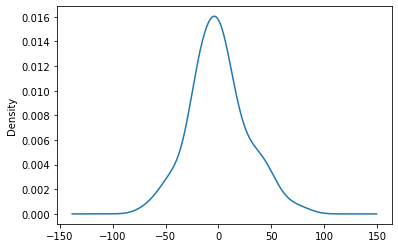

In [40]:
model_Arima_fit.resid.plot(kind='kde')

In [41]:
test_data['Predicted_ARIMA']=pred

<AxesSubplot:xlabel='Month'>

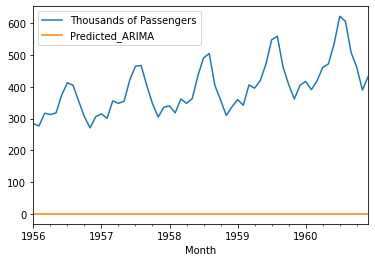

In [42]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

# Construct Seasonal ARIMA based on the data

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
sarimax_model=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [45]:
sarimax_model_fit=sarimax_model.fit()

In [46]:
sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sat, 15 Oct 2022   AIC                            548.481
Time:                                     17:41:34   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
test_data.tail()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers season difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,0.426829
1960-09-01,508.0,-98.0,-82.0,45.0,0.426829
1960-10-01,461.0,-47.0,51.0,54.0,0.426829
1960-11-01,390.0,-71.0,-24.0,28.0,0.426829
1960-12-01,432.0,42.0,113.0,27.0,0.426829


In [48]:
test_pred_start=test_data.index[0]
test_pred_end=test_data.index[-1]
print(test_pred_start)
print(test_pred_end)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [49]:
pred=sarimax_model_fit.predict(start=test_pred_start,end=test_pred_end)

In [50]:
pred


1956-01-01    286.184891
1956-02-01    281.277419
1956-03-01    309.916360
1956-04-01    310.676242
1956-05-01    311.334180
1956-06-01    354.948702
1956-07-01    403.396598
1956-08-01    385.069542
1956-09-01    349.443618
1956-10-01    310.216006
1956-11-01    272.561797
1956-12-01    312.433317
1957-01-01    319.954804
1957-02-01    314.008544
1957-03-01    341.985244
1957-04-01    341.785737
1957-05-01    341.789321
1957-06-01    384.514638
1957-07-01    432.320798
1957-08-01    413.166848
1957-09-01    376.915198
1957-10-01    336.916349
1957-11-01    298.654823
1957-12-01    337.805136
1958-01-01    344.739354
1958-02-01    338.117130
1958-03-01    365.527654
1958-04-01    364.693336
1958-05-01    364.152425
1958-06-01    406.280558
1958-07-01    453.564133
1958-08-01    433.847573
1958-09-01    397.095206
1958-10-01    356.565651
1958-11-01    317.825027
1958-12-01    356.474188
1959-01-01    362.950523
1959-02-01    355.854620
1959-03-01    382.827957
1959-04-01    381.545577


<AxesSubplot:xlabel='Month'>

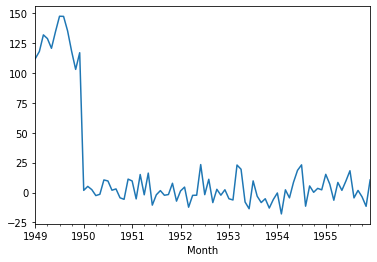

In [51]:
sarimax_model_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

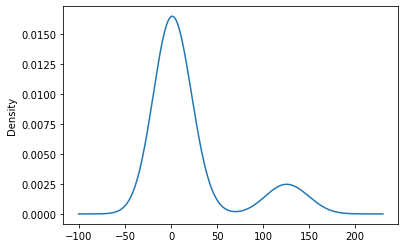

In [52]:
sarimax_model_fit.resid.plot(kind="kde")

In [53]:
test_data['Predicted_SARIMA']=pred

<AxesSubplot:xlabel='Month'>

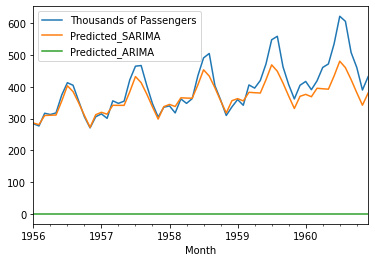

In [54]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [55]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [56]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [57]:
future_datest_df.tail()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers season difference
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [58]:
future_df=pd.concat([df,future_datest_df])

In [70]:
future_df.shape

(167, 5)

<AxesSubplot:>

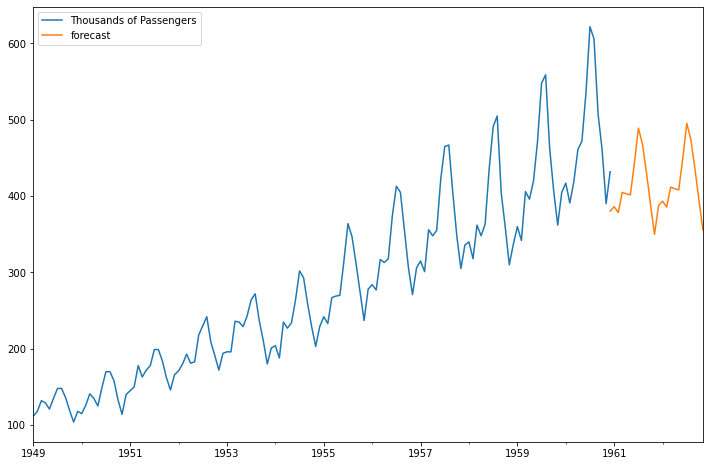

In [74]:
future_df['forecast'] = sarimax_model_fit.predict(start = 143, end = 167, dynamic= True)  
future_df[['Thousands of Passengers', 'forecast']].plot(figsize=(12, 8)) 